<a href="https://colab.research.google.com/github/Radio-active-Boys/ML/blob/ML/Revision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [509]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Revision of all concept

In [510]:
test = pd.read_csv('/content/drive/MyDrive/Python/ML/Files/M5_Projectupdated_ML/M5 Project solution/Raw_Housing_Prices.csv')
test.head()

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,None,...,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,None,...,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,None,...,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,None,...,7,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,None,...,8,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503


# Problem Statement

The data (given below) contains the selling prices of different houses based on different characteristics/attributes like area, no. of rooms, no. of bathrooms, etc.

At times, the property dealers appreciate the prices based on the demand and hence there is rise in prices in real estate. So, in order to cope with this problem so that it is beneficial for the customers, we must have a model in place which should tell us the ideal prices of the house based on its characteristics.

The objective of the study is to predict the ideal prices of the houses based on their characteristics using a regression algorithm.

In [511]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21613 non-null  int64  
 1   Date House was Sold                        21613 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21613 non-null  int64  
 4   No of Bathrooms                            21609 non-null  float64
 5   Flat Area (in Sqft)                        21604 non-null  float64
 6   Lot Area (in Sqft)                         21604 non-null  float64
 7   No of Floors                               21613 non-null  float64
 8   Waterfront View                            21613 non-null  object 
 9   No of Times Visited                        21613 non-null  object 
 10  Condition of the House

# Data Exploration

In [512]:
useless = {'ID' }
numerial = {'Date House was Sold','Sale Price','No of Bedrooms','No of Bathrooms','Flat Area (in Sqft)',
            'Lot Area (in Sqft)','No of Floors','No of Times Visited','Condition of the House','Area of the House from Basement (in Sqft)',
            'Basement Area (in Sqft)','Renovated Year','Living Area after Renovation (in Sqft)','Lot Area after Renovation (in Sqft)'}
categoricial = {'Waterfront View','Overall Grade','Zipcode','Latitude','Longitude',}


target = {'Sale Price'}
independent = {'Date House was Sold','No of Bedrooms','No of Bathrooms','Flat Area (in Sqft)',
            'Lot Area (in Sqft)','No of Floors','No of Times Visited','Condition of the House',
               'Area of the House from Basement (in Sqft)', 'Basement Area (in Sqft)','Renovated Year',
               'Living Area after Renovation (in Sqft)','Lot Area after Renovation (in Sqft)',
               'Waterfront View','Overall Grade','Zipcode','Latitude','Longitude'}

## Target

In [513]:
test['Sale Price'].head(10)

0     221900.0
1     538000.0
2     180000.0
3     604000.0
4     510000.0
5    1230000.0
6     257500.0
7     291850.0
8     229500.0
9     323000.0
Name: Sale Price, dtype: float64

In [514]:
test['Sale Price'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 21613 entries, 0 to 21612
Series name: Sale Price
Non-Null Count  Dtype  
--------------  -----  
21609 non-null  float64
dtypes: float64(1)
memory usage: 169.0 KB


In [515]:
test['Sale Price'].describe()

count    2.160900e+04
mean     5.401984e+05
std      3.673890e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: Sale Price, dtype: float64

### Treating Outliers
by Computing or Imputing

In [516]:
import seaborn as sns

<Axes: xlabel='Sale Price'>

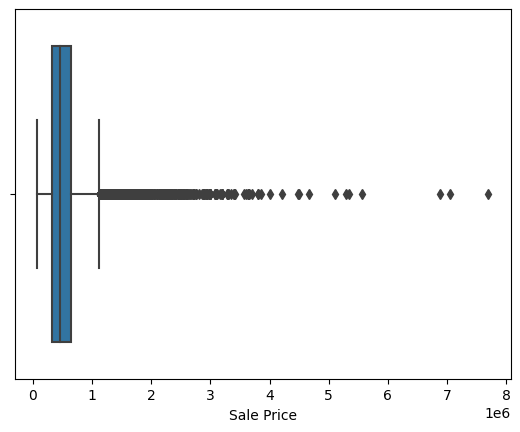

In [517]:
sns.boxplot(x = test['Sale Price'] )

In [518]:
q1 = test['Sale Price'].quantile(0.25)
q3 = test['Sale Price'].quantile(0.75)
q1,q3

(321950.0, 645000.0)

In [519]:
iqr = q3 -q1

In [520]:
upper_lmt = q3 + 1.5*iqr
lower_lmt = q1 - 1.5*iqr
upper_lmt,lower_lmt,test['Sale Price'].max(),test['Sale Price'].min()

(1129575.0, -162625.0, 7700000.0, 75000.0)

In [521]:
lower_lmt = test['Sale Price'].min()

In [522]:
def imputer(x):
  if(x > upper_lmt):
    x  = upper_lmt
  elif(x < lower_lmt):
    x = lower_lmt
  return x


In [523]:
test['Sale Price'] = test['Sale Price'].map(imputer)

In [524]:
'''Mean > Median
The data is not normally distributed and
is a bit skewed towards lower values.'''
test['Sale Price'].describe()

count    2.160900e+04
mean     5.116186e+05
std      2.500620e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      1.129575e+06
Name: Sale Price, dtype: float64

### Treating Null or Missing Values
by Deletion

In [525]:
test.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21613 non-null  int64  
 1   Date House was Sold                        21613 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21613 non-null  int64  
 4   No of Bathrooms                            21609 non-null  float64
 5   Flat Area (in Sqft)                        21604 non-null  float64
 6   Lot Area (in Sqft)                         21604 non-null  float64
 7   No of Floors                               21613 non-null  float64
 8   Waterfront View                            21613 non-null  object 
 9   No of Times Visited                        21613 non-null  object 
 10  Condition of the House

In [526]:
test.dropna(inplace = True , axis = 0, subset = ['Sale Price'])

In [527]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21609 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21609 non-null  int64  
 1   Date House was Sold                        21609 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21609 non-null  int64  
 4   No of Bathrooms                            21605 non-null  float64
 5   Flat Area (in Sqft)                        21600 non-null  float64
 6   Lot Area (in Sqft)                         21600 non-null  float64
 7   No of Floors                               21609 non-null  float64
 8   Waterfront View                            21609 non-null  object 
 9   No of Times Visited                        21609 non-null  object 
 10  Condition of the House

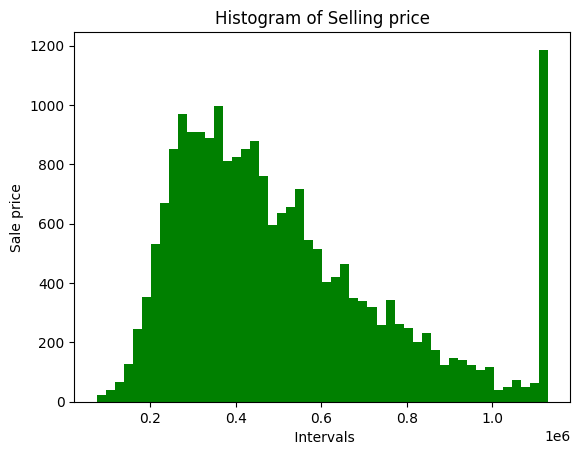

In [528]:
# How the values are distributed over the range?
plt.hist(test['Sale Price'],bins = 50,color ='green' )
plt.xlabel( " Intervals" )
plt.ylabel("Sale price")
plt.title("Histogram of Selling price")
plt.show( )


## Independent Numerical

In [529]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21609 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21609 non-null  int64  
 1   Date House was Sold                        21609 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21609 non-null  int64  
 4   No of Bathrooms                            21605 non-null  float64
 5   Flat Area (in Sqft)                        21600 non-null  float64
 6   Lot Area (in Sqft)                         21600 non-null  float64
 7   No of Floors                               21609 non-null  float64
 8   Waterfront View                            21609 non-null  object 
 9   No of Times Visited                        21609 non-null  object 
 10  Condition of the House

In [530]:
numerical_null = ['No of Bathrooms','Flat Area (in Sqft)','Lot Area (in Sqft)','Area of the House from Basement (in Sqft)',
                  'Living Area after Renovation (in Sqft)','Latitude','Longitude']

In [531]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values= np.nan ,strategy = 'median')
test[numerical_null] = imputer.fit_transform(test[numerical_null])

In [532]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21609 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21609 non-null  int64  
 1   Date House was Sold                        21609 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21609 non-null  int64  
 4   No of Bathrooms                            21609 non-null  float64
 5   Flat Area (in Sqft)                        21609 non-null  float64
 6   Lot Area (in Sqft)                         21609 non-null  float64
 7   No of Floors                               21609 non-null  float64
 8   Waterfront View                            21609 non-null  object 
 9   No of Times Visited                        21609 non-null  object 
 10  Condition of the House

In [533]:
imputer2 = SimpleImputer(missing_values= np.nan ,strategy = 'most_frequent')
test['Zipcode'] = imputer2.fit_transform(test['Zipcode'])

ValueError: ignored

In [534]:
test['Zipcode'].shape

(21609,)

In [535]:
column = test['Zipcode'].values.reshape(-1,1)
column.shape

(21609, 1)

In [536]:
imputer2 = SimpleImputer(missing_values= np.nan ,strategy = 'most_frequent')
column = imputer2.fit_transform(column)

In [537]:
test['Zipcode'] = column


In [538]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21609 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21609 non-null  int64  
 1   Date House was Sold                        21609 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21609 non-null  int64  
 4   No of Bathrooms                            21609 non-null  float64
 5   Flat Area (in Sqft)                        21609 non-null  float64
 6   Lot Area (in Sqft)                         21609 non-null  float64
 7   No of Floors                               21609 non-null  float64
 8   Waterfront View                            21609 non-null  object 
 9   No of Times Visited                        21609 non-null  object 
 10  Condition of the House

In [539]:
test.dtypes

ID                                             int64
Date House was Sold                           object
Sale Price                                   float64
No of Bedrooms                                 int64
No of Bathrooms                              float64
Flat Area (in Sqft)                          float64
Lot Area (in Sqft)                           float64
No of Floors                                 float64
Waterfront View                               object
No of Times Visited                           object
Condition of the House                        object
Overall Grade                                  int64
Area of the House from Basement (in Sqft)    float64
Basement Area (in Sqft)                        int64
Age of House (in Years)                        int64
Renovated Year                                 int64
Zipcode                                      float64
Latitude                                     float64
Longitude                                    f

**Variable Transformation**
playing with object datatypes

In [540]:
test['No of Times Visited'].unique()

array(['None', 'Thrice', 'Four', 'Twice', 'Once'], dtype=object)

In [541]:
mapping = {'None':0, 'Thrice':3, 'Four':4, 'Twice':3, 'Once':1}
test['No of Times Visited'] = test['No of Times Visited'].map(mapping)
test['No of Times Visited'].unique()

array([0, 3, 4, 1])

In [542]:
test['Ever_renovated'] = np.where(test['Renovated Year'] == 0, 'No','Yes')

In [543]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21609 entries, 0 to 21612
Data columns (total 22 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21609 non-null  int64  
 1   Date House was Sold                        21609 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21609 non-null  int64  
 4   No of Bathrooms                            21609 non-null  float64
 5   Flat Area (in Sqft)                        21609 non-null  float64
 6   Lot Area (in Sqft)                         21609 non-null  float64
 7   No of Floors                               21609 non-null  float64
 8   Waterfront View                            21609 non-null  object 
 9   No of Times Visited                        21609 non-null  int64  
 10  Condition of the House

In [544]:
test['purcharse_year'] = pd.DatetimeIndex(test['Date House was Sold']).year

In [545]:
test['Year_of_renovation'] = np.where(test['Renovated Year']=='Yes', abs(test['purcharse_year'] - test['Renovated Year']) , 0)


In [546]:
test['Year_of_renovation'].head(30)

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
Name: Year_of_renovation, dtype: int64

In [547]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21609 entries, 0 to 21612
Data columns (total 24 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21609 non-null  int64  
 1   Date House was Sold                        21609 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21609 non-null  int64  
 4   No of Bathrooms                            21609 non-null  float64
 5   Flat Area (in Sqft)                        21609 non-null  float64
 6   Lot Area (in Sqft)                         21609 non-null  float64
 7   No of Floors                               21609 non-null  float64
 8   Waterfront View                            21609 non-null  object 
 9   No of Times Visited                        21609 non-null  int64  
 10  Condition of the House

In [548]:
test.drop(columns = ['Date House was Sold', 'Renovated Year','purcharse_year'], inplace=True)

In [549]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21609 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21609 non-null  int64  
 1   Sale Price                                 21609 non-null  float64
 2   No of Bedrooms                             21609 non-null  int64  
 3   No of Bathrooms                            21609 non-null  float64
 4   Flat Area (in Sqft)                        21609 non-null  float64
 5   Lot Area (in Sqft)                         21609 non-null  float64
 6   No of Floors                               21609 non-null  float64
 7   Waterfront View                            21609 non-null  object 
 8   No of Times Visited                        21609 non-null  int64  
 9   Condition of the House                     21609 non-null  object 
 10  Overall Grade         

In [550]:
test.drop(columns = 'ID').corr()

<ipython-input-550-e69c2fe749ed>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  test.drop(columns = 'ID').corr()


,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Year_of_renovation
Sale Price,1.000000,0.339407,0.535124,0.695170,0.101319,0.298913,0.346789,0.680914,0.606527,0.307513,-0.064306,-0.043047,0.402430,0.045401,0.629944,0.092325,NaN
No of Bedrooms,0.339407,1.000000,0.515813,0.576628,0.031692,0.175536,0.079217,0.349223,0.477549,0.303294,-0.154113,-0.152760,-0.008708,0.129569,0.391771,0.029264,NaN
No of Bathrooms,0.535124,0.515813,1.000000,0.754568,0.087732,0.500776,0.182487,0.635638,0.685088,0.283798,-0.505954,-0.203951,0.024570,0.223171,0.568568,0.087226,NaN
Flat Area (in Sqft),0.695170,0.576628,0.754568,1.000000,0.172721,0.354142,0.277353,0.705725,0.876226,0.435142,-0.318146,-0.199380,0.052538,0.240091,0.756185,0.183223,NaN
Lot Area (in Sqft),0.101319,0.031692,0.087732,0.172721,1.000000,-0.005162,0.073163,0.102314,0.183492,0.015252,-0.053119,-0.129551,-0.085719,0.229449,0.144507,0.718527,NaN
No of Floors,0.298913,0.175536,0.500776,0.354142,-0.005162,1.000000,0.027760,0.461368,0.524031,-0.245572,-0.489244,-0.059222,0.049692,0.125620,0.280106,-0.011204,NaN
No of Times Visited,0.346789,0.079217,0.182487,0.277353,0.073163,0.027760,1.000000,0.219299,0.163100,0.270642,0.056487,0.085365,0.006501,-0.076981,0.274753,0.071001,NaN
Overall Grade,0.680914,0.349223,0.635638,0.705725,0.102314,0.461368,0.219299,1.000000,0.705153,0.145232,-0.456711,-0.185844,0.111226,0.201736,0.681362,0.107581,NaN
Area of the House from Basement (in Sqft),0.606527,0.477549,0.685088,0.876226,0.183492,0.524031,0.163100,0.705153,1.000000,-0.051825,-0.423848,-0.261124,-0.000819,0.343793,0.731996,0.194106,NaN
Basement Area (in Sqft),0.307513,0.303294,0.283798,0.435142,0.015252,-0.245572,0.270642,0.145232,-0.051825,1.000000,0.133072,0.074933,0.110451,-0.144822,0.200302,0.017263,NaN


## Categorical

### ANOVA
Analysis of variance

In [551]:
test = test.rename(columns = {'Sale Price' : 'Sale_Price'})
test = test.rename(columns = {'Condition of the House' : 'Condition_of_the_House'})
test = test.rename(columns = {'Waterfront View' : 'Waterfront_View'})

In [552]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

In [553]:
mod = ols('Sale_Price~Condition_of_the_House', data = test).fit()
sm.stats.anova_lm(mod,typ =2)

,sum_sq,df,F,PR(>F)
Condition_of_the_House,1.441831e+13,4.0,58.25563,5.447605e-49
Residual,1.336752e+15,21604.0,NaN,NaN


In [554]:
mod = ols('Sale_Price~Ever_renovated', data = test).fit()
sm.stats.anova_lm(mod,typ =2)

,sum_sq,df,F,PR(>F)
Ever_renovated,1.998463e+13,1.0,324.378469,5.419055e-72
Residual,1.331185e+15,21607.0,NaN,NaN


In [555]:
mod = ols('Sale_Price~Waterfront_View', data = test).fit()
sm.stats.anova_lm(mod,typ =2)

,sum_sq,df,F,PR(>F)
Waterfront_View,3.283737e+13,1.0,538.192683,1.275558e-117
Residual,1.318333e+15,21607.0,NaN,NaN


In [556]:
mod = ols('Sale_Price~Zipcode', data = test).fit()
sm.stats.anova_lm(mod,typ =2)

,sum_sq,df,F,PR(>F)
Zipcode,2.503765e+12,1.0,40.112844,2.444308e-10
Residual,1.348666e+15,21607.0,NaN,NaN


### Binning and Dummies

In [557]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21609 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21609 non-null  int64  
 1   Sale_Price                                 21609 non-null  float64
 2   No of Bedrooms                             21609 non-null  int64  
 3   No of Bathrooms                            21609 non-null  float64
 4   Flat Area (in Sqft)                        21609 non-null  float64
 5   Lot Area (in Sqft)                         21609 non-null  float64
 6   No of Floors                               21609 non-null  float64
 7   Waterfront_View                            21609 non-null  object 
 8   No of Times Visited                        21609 non-null  int64  
 9   Condition_of_the_House                     21609 non-null  object 
 10  Overall Grade         

In [558]:
test['Condition_of_the_House'].unique(), test['Zipcode'].unique()

(array(['Fair', 'Excellent', 'Good', 'Bad', 'Okay'], dtype=object),
 array([98178., 98125., 98028., 98136., 98074., 98053., 98003., 98198.,
        98146., 98038., 98007., 98115., 98107., 98126., 98019., 98103.,
        98002., 98133., 98040., 98092., 98030., 98119., 98112., 98052.,
        98027., 98117., 98058., 98001., 98056., 98166., 98023., 98070.,
        98148., 98105., 98042., 98008., 98059., 98122., 98144., 98004.,
        98005., 98034., 98075., 98116., 98010., 98118., 98199., 98032.,
        98045., 98102., 98077., 98108., 98168., 98177., 98065., 98029.,
        98006., 98109., 98022., 98033., 98155., 98024., 98011., 98031.,
        98106., 98072., 98188., 98014., 98055., 98039.]))

In [559]:
test = pd.get_dummies(test , columns =[ 'Condition_of_the_House'], drop_first = True)
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21609 entries, 0 to 21612
Data columns (total 24 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21609 non-null  int64  
 1   Sale_Price                                 21609 non-null  float64
 2   No of Bedrooms                             21609 non-null  int64  
 3   No of Bathrooms                            21609 non-null  float64
 4   Flat Area (in Sqft)                        21609 non-null  float64
 5   Lot Area (in Sqft)                         21609 non-null  float64
 6   No of Floors                               21609 non-null  float64
 7   Waterfront_View                            21609 non-null  object 
 8   No of Times Visited                        21609 non-null  int64  
 9   Overall Grade                              21609 non-null  int64  
 10  Area of the House from

In [560]:
test = pd.get_dummies(test , columns =[ 'Ever_renovated','Waterfront_View' ], drop_first = True)
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21609 entries, 0 to 21612
Data columns (total 24 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21609 non-null  int64  
 1   Sale_Price                                 21609 non-null  float64
 2   No of Bedrooms                             21609 non-null  int64  
 3   No of Bathrooms                            21609 non-null  float64
 4   Flat Area (in Sqft)                        21609 non-null  float64
 5   Lot Area (in Sqft)                         21609 non-null  float64
 6   No of Floors                               21609 non-null  float64
 7   No of Times Visited                        21609 non-null  int64  
 8   Overall Grade                              21609 non-null  int64  
 9   Area of the House from Basement (in Sqft)  21609 non-null  float64
 10  Basement Area (in Sqft

In [561]:
zip_table = test.groupby('Zipcode').agg({'Sale_Price':'mean'}).sort_values('Sale_Price')
zip_table.head()

,Sale_Price
Zipcode,
98002.0,234284.035176
98168.0,240328.371747
98032.0,251296.240000
98001.0,280804.690608
98148.0,284908.596491


In [562]:
zip_table[ 'Zipcode_Group'] = pd.cut(zip_table['Sale_Price'], bins = 10,
labels =[ 'Zipcode_Group_0',
         'Zipcode_Group_1',
          'Zipcode_Group_2',
          'Zipcode_Group_3',
          'Zipcode_Group_4',
          'Zipcode_Group_5',
          'Zipcode_Group_6',
          'Zipcode_Group_7',
          'Zipcode_Group_8',
          'Zipcode_Group_9'],include_lowest = True)
zip_table.head(20)

,Sale_Price,Zipcode_Group
Zipcode,,
98002.0,234284.035176,Zipcode_Group_0
98168.0,240328.371747,Zipcode_Group_0
98032.0,251296.240000,Zipcode_Group_0
98001.0,280804.690608,Zipcode_Group_0
98148.0,284908.596491,Zipcode_Group_0
98023.0,286486.572289,Zipcode_Group_0
98188.0,289078.345588,Zipcode_Group_0
98003.0,294111.278571,Zipcode_Group_0
98030.0,296187.980469,Zipcode_Group_0


In [563]:
zip_table = zip_table.drop(columns = 'Sale_Price')

In [564]:
test = pd.merge(test, zip_table, left_on = 'Zipcode', how = 'left', right_index= True)
test.head()

,ID,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),...,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Year_of_renovation,Condition_of_the_House_Excellent,Condition_of_the_House_Fair,Condition_of_the_House_Good,Condition_of_the_House_Okay,Ever_renovated_Yes,Waterfront_View_Yes,Zipcode_Group
0,7129300520,221900.0,3,1.00,1180.0,5650.0,1.0,0,7,1180.0,...,1340.0,5650,0,0,1,0,0,0,0,Zipcode_Group_0
1,6414100192,538000.0,3,2.25,2570.0,7242.0,2.0,0,7,2170.0,...,1690.0,7639,0,0,1,0,0,1,0,Zipcode_Group_2
2,5631500400,180000.0,2,1.00,770.0,10000.0,1.0,0,6,770.0,...,2720.0,8062,0,0,1,0,0,0,0,Zipcode_Group_2
3,2487200875,604000.0,4,3.00,1960.0,5000.0,1.0,0,7,1050.0,...,1360.0,5000,0,1,0,0,0,0,0,Zipcode_Group_3
4,1954400510,510000.0,3,2.00,1680.0,8080.0,1.0,0,8,1680.0,...,1800.0,7503,0,0,1,0,0,0,0,Zipcode_Group_4


In [565]:
test = test.drop(columns = 'Zipcode')
test = test.drop(columns = 'ID')

In [566]:
test = pd.get_dummies(test , columns =[ 'Zipcode_Group' ], drop_first = True)
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21609 entries, 0 to 21612
Data columns (total 31 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Sale_Price                                 21609 non-null  float64
 1   No of Bedrooms                             21609 non-null  int64  
 2   No of Bathrooms                            21609 non-null  float64
 3   Flat Area (in Sqft)                        21609 non-null  float64
 4   Lot Area (in Sqft)                         21609 non-null  float64
 5   No of Floors                               21609 non-null  float64
 6   No of Times Visited                        21609 non-null  int64  
 7   Overall Grade                              21609 non-null  int64  
 8   Area of the House from Basement (in Sqft)  21609 non-null  float64
 9   Basement Area (in Sqft)                    21609 non-null  int64  
 10  Age of House (in Years

# Model Training and Visualization
by **linear regression**

## Scalling

In [567]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Y = test['Sale_Price']
X = scaler.fit_transform(test.drop(columns = ['Sale_Price']))
X = pd.DataFrame(data = test , columns = test.drop(columns = ['Sale_Price']).columns)
X.head()

,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),...,Waterfront_View_Yes,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9
0,3,1.00,1180.0,5650.0,1.0,0,7,1180.0,0,63,...,0,0,0,0,0,0,0,0,0,0
1,3,2.25,2570.0,7242.0,2.0,0,7,2170.0,400,67,...,0,0,1,0,0,0,0,0,0,0
2,2,1.00,770.0,10000.0,1.0,0,6,770.0,0,85,...,0,0,1,0,0,0,0,0,0,0
3,4,3.00,1960.0,5000.0,1.0,0,7,1050.0,910,53,...,0,0,0,1,0,0,0,0,0,0
4,3,2.00,1680.0,8080.0,1.0,0,8,1680.0,0,31,...,0,0,0,0,1,0,0,0,0,0


## VIF

In [568]:
from  statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = X

In [569]:
def MC_remover(data):
    vif = pd.Series([variance_inflation_factor(data.values, i) for i in range(data.shape[1])], index=data.columns)
    if vif.max() > 5:
        print(vif[vif == vif.max()].index[0], "has been removed")
        data = data.drop(columns=[vif[vif == vif.max()].index[0]])
        return MC_remover(data)
    else:
        print("Multi-collinearity has been removed")
        return data


In [570]:
vif_data = MC_remover(vif_data)


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1754: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


Latitude has been removed


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1754: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


Flat Area (in Sqft) has been removed


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1754: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


Longitude has been removed


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1754: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


Overall Grade has been removed


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1754: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


Condition_of_the_House_Fair has been removed


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1754: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


No of Bathrooms has been removed


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1754: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


Living Area after Renovation (in Sqft) has been removed


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1754: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


No of Bedrooms has been removed


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1754: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


No of Floors has been removed


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1754: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


Multi-collinearity has been removed


In [571]:

vif_data.head()

,Lot Area (in Sqft),No of Times Visited,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Lot Area after Renovation (in Sqft),Year_of_renovation,Condition_of_the_House_Excellent,Condition_of_the_House_Good,Condition_of_the_House_Okay,...,Waterfront_View_Yes,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9
0,5650.0,0,1180.0,0,63,5650,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7242.0,0,2170.0,400,67,7639,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,10000.0,0,770.0,0,85,8062,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,5000.0,0,1050.0,910,53,5000,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,8080.0,0,1680.0,0,31,7503,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


## Splitting of data

In [572]:
x = vif_data
y = test['Sale_Price']
x.shape,y.shape

((21609, 21), (21609,))

In [573]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train, y_test = train_test_split(x,y,test_size = 0.3 , random_state = 101)
x_train.shape,x_test.shape,y_train.shape, y_test.shape

((15126, 21), (6483, 21), (15126,), (6483,))

## Train Model

In [574]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [575]:
predictions = lr.predict(x_test)
lr.score(x_test,y_test)

0.7995229108586046